# K-Means

In [155]:
pip install -U numpy

Note: you may need to restart the kernel to use updated packages.


In [156]:
import sklearn


In [157]:
from sklearn.cluster import KMeans

In [158]:
import sklearn.cluster as cluster

In [159]:
import matplotlib.pyplot as plt
import math

In [160]:
import pandas as pd

In [161]:
import numpy as np

### Q1 (a)(b)

In [162]:
data = np.loadtxt("/Users/haoranzhang/CS6220/assignment-4-hrcheung/data/f150_motor_distributors.txt",delimiter=",")

In [163]:
data

array([[-11.96999577,  -8.03962819],
       [-26.96141582,  -6.96210943],
       [-12.91584891,  -1.37894148],
       ...,
       [ 12.92550271,  -0.10319682],
       [-34.33677838,   4.4057531 ],
       [-26.81273855,  -1.63995599]])

In [164]:
data.shape

(5000, 2)

In [165]:
#initialization vectors are:
initialization=np.array([[10,10],[-10,-10],[2,2],[3,3],[-3,-3]])

In [166]:
type(initialization)

numpy.ndarray

In [167]:
initialization.shape

(5, 2)

In [168]:
kmeans=cluster.KMeans(n_clusters=5,init=initialization,max_iter=100)

In [169]:
label=kmeans.fit_predict(data)

/Users/haoranzhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haoranzhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [170]:
label

array([4, 1, 4, ..., 3, 1, 1], dtype=int32)

In [171]:
centroids = kmeans.cluster_centers_
centroids

array([[ 27.3664243 ,  -1.09580993],
       [-31.94805334,   2.59901959],
       [ -1.04061308,  -2.28300242],
       [ 11.68619774,  -1.68891573],
       [-14.50973012,  -0.54232205]])

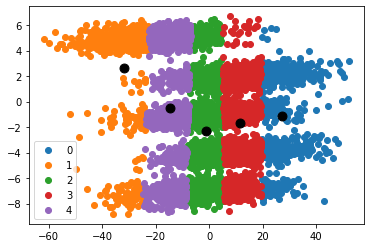

In [172]:
u_labels=np.unique(label) #allocat label to different clusters
for i in u_labels:
    plt.scatter(data[label==i,0],data[label==i,1],label=i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

### Q1(c)

Based on the cluster figure above, the cluster result does not look good.

I am suspecting the initialization vectors and centroids are incorrect. They are all on the line of y=x, which disturbed the accurate clustering process. 

Based on the picture, a better intialization would be y=c, where c in the constant, since apparently points can be clustered as blocks layered parallel to the x axis. 

/Users/haoranzhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haoranzhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haoranzhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haoranzhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

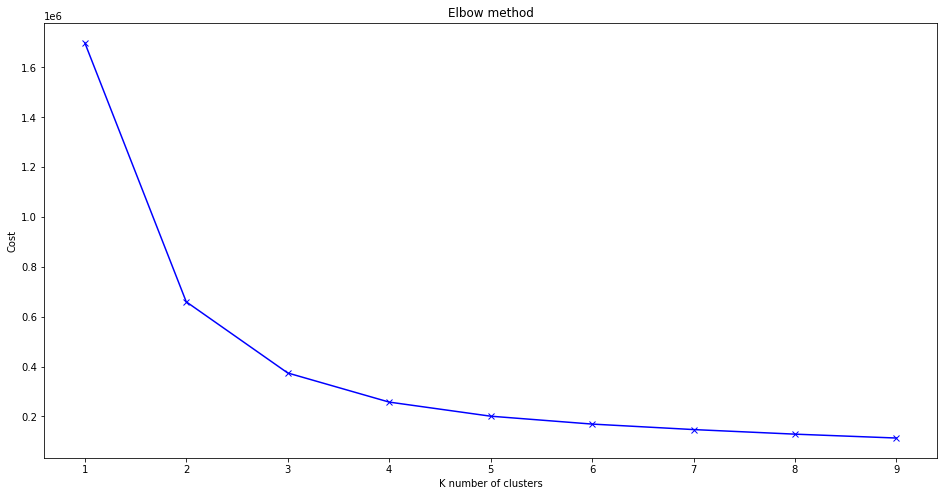

In [173]:
cost = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(data)
    cost.append(kmeanModel.inertia_) #sum of distances to cluster center

plt.figure(figsize=(16,8))
plt.plot(K, cost, 'bx-')
plt.xlabel('K number of clusters')
plt.ylabel('Cost')
plt.title('Elbow method')
plt.show()

k=3 is a relatively good choice from the perspective of cost, according to Elbow method. 

## Q1 a) b) write k-means by hand

In [174]:
df = pd.DataFrame(data, columns = ['x','y'])
df

,x,y
0,-11.969996,-8.039628
1,-26.961416,-6.962109
2,-12.915849,-1.378941
3,22.476144,2.066612
4,-13.146631,4.835322
...,...,...
4995,6.852668,1.549076
4996,-2.340729,-7.343469
4997,12.925503,-0.103197
4998,-34.336778,4.405753


In [175]:
def euclideanDistance(p1,p2):
    return math.sqrt(((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )

def find_closest_centroid(point,centroids):
#     for i in range(len(centroids)):
#         clusters[i]=list()
    minV=float("inf")
    label=-1
    for i, center in enumerate(centroids):
        if euclideanDistance(center,point)<minV:
            label=i
            minV=euclideanDistance(center,point)
    return label

#compute new centroid after assign
def computeNewCentroid(X):
    new=list()
    tmp=X.groupby(by='label').mean()
    for row in range(len(tmp)):
        new.append([tmp.at[row,'x'],tmp.at[row,'y']])
    return new
    

#check if centroids change
def centroidsChange(old,new):
    if euclideanDistance(old,new)>0.000000000001:
        return True
    else:
        return False

def fit(X,initialization,max_iter,n_cluster):
    centroids=initialization
#     print("initial centroids =",centroids)
    
    X['label']=X.apply(lambda row: find_closest_centroid((row[0],row[1]),centroids), axis=1)
    for i in range(max_iter):
        new_centroids=computeNewCentroid(X)
#         print("new centroids is",new_centroids)
        for i in range(len(centroids)):
            if not centroidsChange(centroids[i],new_centroids[i]):
                break
            else:
                centroids=new_centroids
                X['label']=X.apply(lambda row: find_closest_centroid((row[0],row[1]),centroids), axis=1)
    return centroids

initialization=[[10,10],[-10,-10],[2,2],[3,3],[-3,-3]]
#         new_centroids=findNewCentroids(centroids)
clusters=fit(df,initialization,100,5)
clusters=np.asarray(clusters)
clusters

array([[ 28.09146831,  -1.0241717 ],
       [-30.93833893,   2.43436785],
       [  0.52511293,  -2.3158082 ],
       [ 12.86956124,  -1.68099097],
       [-12.88359021,  -0.80312447]])

In [176]:
df

,x,y,label
0,-11.969996,-8.039628,4
1,-26.961416,-6.962109,1
2,-12.915849,-1.378941,4
3,22.476144,2.066612,0
4,-13.146631,4.835322,4
...,...,...,...
4995,6.852668,1.549076,3
4996,-2.340729,-7.343469,2
4997,12.925503,-0.103197,3
4998,-34.336778,4.405753,1


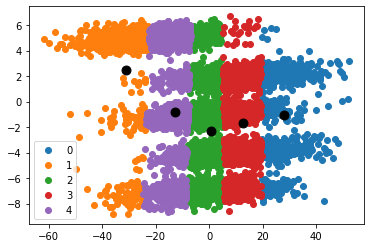

In [177]:
u_labels=np.unique(df['label']) #allocat label to different clusters
for i in u_labels:
    plt.scatter(data[label==i,0],data[label==i,1],label=i)
plt.scatter(clusters[:,0] , clusters[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

## Q2

### Q2 a)

In [178]:
#compute P-1 first
P_value=[[10,0.5],[-10,0.25]]
P=np.matrix(P_value)
R=(P.T @ P).I

In [179]:
R

matrix([[ 0.00555556, -0.04444444],
        [-0.04444444,  3.55555556]])

In [180]:
def mahalaDistance(x,y):
    x=np.asarray(x)
    y=np.asarray(y)
    return (x-y).T @ R @ (x-y)

def find_closest_centroid(point,centroids):
#     for i in range(len(centroids)):
#         clusters[i]=list()
    minV=float("inf")
    label=-1
    for i, center in enumerate(centroids):
        if mahalaDistance(center,point)<minV:
            label=i
            minV=mahalaDistance(center,point)
    return label

#compute new centroid after assign
def computeNewCentroid(X):
    new=list()
    tmp=X.groupby(by='label').mean()
    for row in range(len(tmp)):
        new.append([tmp.at[row,'x'],tmp.at[row,'y']])
    return new
    

#check if centroids change
def centroidsChange(old,new):
    if mahalaDistance(old,new)>0.000000000001:
        return True
    else:
        return False

def fit(X,initialization,max_iter,n_cluster):
    centroids=initialization
#     print("initial centroids =",centroids)
    
    X['label']=X.apply(lambda row: find_closest_centroid((row[0],row[1]),centroids), axis=1)
    for i in range(max_iter):
        new_centroids=computeNewCentroid(X)
#         print("new centroids is",new_centroids)
        for i in range(len(centroids)):
            if not centroidsChange(centroids[i],new_centroids[i]):
                break
            else:
                centroids=new_centroids
                X['label']=X.apply(lambda row: find_closest_centroid((row[0],row[1]),centroids), axis=1)
    return centroids


In [181]:
df= pd.DataFrame(data, columns = ['x','y'])

In [182]:
df

,x,y
0,-11.969996,-8.039628
1,-26.961416,-6.962109
2,-12.915849,-1.378941
3,22.476144,2.066612
4,-13.146631,4.835322
...,...,...
4995,6.852668,1.549076
4996,-2.340729,-7.343469
4997,12.925503,-0.103197
4998,-34.336778,4.405753


In [183]:
initialization=[[10,10],[-10,-10],[2,2],[3,3],[-3,-3]]
#         new_centroids=findNewCentroids(centroids)
clusters=fit(df,initialization,100,5)
clusters=np.asarray(clusters)
clusters

array([[-20.40310599,   5.00655283],
       [ -3.24764066,  -7.01766444],
       [ -1.00542627,  -0.97629543],
       [  9.96452001,   2.01588007],
       [  8.72391858,  -4.00459056]])

In [184]:
df

,x,y,label
0,-11.969996,-8.039628,1
1,-26.961416,-6.962109,1
2,-12.915849,-1.378941,2
3,22.476144,2.066612,3
4,-13.146631,4.835322,0
...,...,...,...
4995,6.852668,1.549076,3
4996,-2.340729,-7.343469,1
4997,12.925503,-0.103197,2
4998,-34.336778,4.405753,0


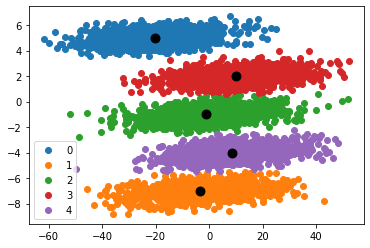

In [185]:
u_labels=np.unique(df['label']) #allocat label to different clusters
for i in u_labels:
    row=np.where(df.label==i)
    plt.scatter(df.iloc[row]['x'],df.iloc[row]['y'],label=i)
plt.scatter(clusters[:,0] , clusters[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

Points are clustered into a right way. Using Mahalanobis Distance allows a different way to calculate similarity between points. 

### Q2 b)

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn

In [187]:
data_q2=df
data_q2.head()

,x,y,label
0,-11.969996,-8.039628,1
1,-26.961416,-6.962109,1
2,-12.915849,-1.378941,2
3,22.476144,2.066612,3
4,-13.146631,4.835322,0


In [188]:
target=data_q2['label']

In [189]:
data=data_q2.loc[:,['x','y']]

In [190]:
data

,x,y
0,-11.969996,-8.039628
1,-26.961416,-6.962109
2,-12.915849,-1.378941
3,22.476144,2.066612
4,-13.146631,4.835322
...,...,...
4995,6.852668,1.549076
4996,-2.340729,-7.343469
4997,12.925503,-0.103197
4998,-34.336778,4.405753


In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(data))


StandardScaler()


In [192]:
print(scaler.mean_)

[-1.22012285 -1.00360882]


In [193]:
data_z_score=scaler.transform(data)

In [194]:
print(data_z_score)

[[-0.59957277 -1.64159106]
 [-1.43571729 -1.39019249]
 [-0.65232761 -0.08756979]
 ...
 [ 0.78897044  0.21007735]
 [-1.84707718  1.26207159]
 [-1.42742483 -0.14846773]]


#### PCA

In [195]:
from sklearn.decomposition import PCA
# Two components of PCA
pca = PCA(2)

# Fit on data
pca.fit(data_z_score)

# Access values and vectors
print(pca.components_)
print(pca.explained_variance_)

# transform data
B = pca.transform(data_z_score)
print(B)

[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
[1.22552735 0.77487273]
[[-0.7368182   1.58474214]
 [ 0.03219089  1.99821997]
 [ 0.39934408  0.52318647]
 ...
 [-0.40933923 -0.70643346]
 [ 2.19850018  0.41366142]
 [ 0.90435924  1.11432431]]


In [196]:
B.shape

(5000, 2)

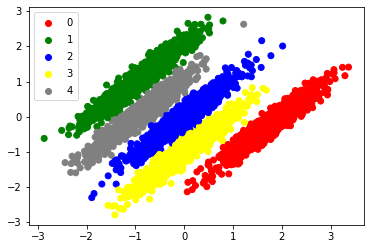

In [197]:
import matplotlib.pyplot as plt
import matplotlib
colors=['red','green','blue','yellow','grey']
scatter=plt.scatter(B[:, 0], B[:, 1],c=target,\
                    cmap=matplotlib.colors.ListedColormap(colors),marker='o')
plt.legend(*scatter.legend_elements())
plt.show()

### if not Z-score scalar

In [198]:
data

,x,y
0,-11.969996,-8.039628
1,-26.961416,-6.962109
2,-12.915849,-1.378941
3,22.476144,2.066612
4,-13.146631,4.835322
...,...,...
4995,6.852668,1.549076
4996,-2.340729,-7.343469
4997,12.925503,-0.103197
4998,-34.336778,4.405753


In [199]:
from sklearn.decomposition import PCA
# Two components of PCA
pca = PCA(2)

# Fit on data
pca.fit(data)

# Access values and vectors
print(pca.components_)
print(pca.explained_variance_)

# transform data
B = pca.transform(data)
print(B)

[[-0.99838317  0.05684225]
 [-0.05684225 -0.99838317]]
[322.50713273  17.38845582]
[[ 10.33254906   7.6356903 ]
 [ 25.36097916   7.41205973]
 [ 11.65548133   1.03953719]
 ...
 [-14.07157308  -1.70302537]
 [ 33.3705919   -3.51819072]
 [ 25.51506544   2.09006015]]


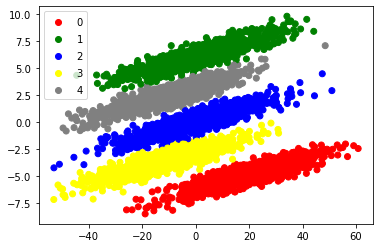

In [200]:
import matplotlib.pyplot as plt
import matplotlib
colors=['red','green','blue','yellow','grey']
scatter=plt.scatter(B[:, 0], B[:, 1],c=target,\
                    cmap=matplotlib.colors.ListedColormap(colors),marker='o')
plt.legend(*scatter.legend_elements())
plt.show()

### Q2 c)

In [201]:
data_q2

,x,y,label
0,-11.969996,-8.039628,1
1,-26.961416,-6.962109,1
2,-12.915849,-1.378941,2
3,22.476144,2.066612,3
4,-13.146631,4.835322,0
...,...,...,...
4995,6.852668,1.549076,3
4996,-2.340729,-7.343469,1
4997,12.925503,-0.103197,2
4998,-34.336778,4.405753,0


In [202]:
cluster_0=data_q2[data_q2['label'] == 0]
cluster_1=data_q2[data_q2['label'] == 1]
cluster_2=data_q2[data_q2['label'] == 2]
cluster_3=data_q2[data_q2['label'] == 3]
cluster_4=data_q2[data_q2['label'] == 4]

In [203]:
cluster_0

,x,y,label
4,-13.146631,4.835322,0
12,-38.508282,4.112202,0
19,6.843345,4.550918,0
22,-36.768240,4.173526,0
25,-16.883207,4.664295,0
...,...,...,...
4985,-41.441343,5.164262,0
4987,-39.028493,5.153460,0
4991,-14.425117,5.286585,0
4994,-11.915634,5.320493,0


In [206]:
cluster_0=cluster_0.iloc[:,:2]
cluster_1=cluster_1.iloc[:,:2]
cluster_2=cluster_2.iloc[:,:2]
cluster_3=cluster_3.iloc[:,:2]
cluster_4=cluster_4.iloc[:,:2]

In [209]:
def pca_onto_cluster(x):
#     scaler = StandardScaler()
#     scaler.fit(data)
#     data_z_score=scaler.transform(data)
    # Two components of PCA
    pca = PCA(2)

    # Fit on data
    pca.fit(x)

    # Access values and vectors
    # transform data
    B = pca.transform(x)
    return B

In [210]:
res0=pca_onto_cluster(cluster_0)
res0

array([[  7.25405752,   0.25378307],
       [-18.11417956,   0.68829451],
       [ 27.23950349,   0.76561297],
       ...,
       [  5.98078814,  -0.21199726],
       [  8.49049436,  -0.21735037],
       [-13.9396063 ,   0.44222502]])

In [211]:
res1=pca_onto_cluster(cluster_1)
res1

array([[ -8.73419248,   0.91529791],
       [-23.71132555,  -0.34533961],
       [  1.94266087,  -0.75298475],
       ...,
       [  6.37240317,   0.70787872],
       [-15.07539706,  -0.44106933],
       [  0.90286284,   0.33686259]])

In [212]:
res2=pca_onto_cluster(cluster_2)
res2

array([[-11.81898073,  -0.22222287],
       [ -7.96831058,  -0.07484901],
       [-21.787302  ,   0.26996112],
       ...,
       [-15.0302669 ,  -0.59978662],
       [ 14.03719841,   0.70566602],
       [-25.71812447,  -0.29620696]])

In [213]:
res3=pca_onto_cluster(cluster_3)
res3

array([[ 12.50154109,  -0.080114  ],
       [ 26.88083768,   0.15701845],
       [-12.34056372,  -0.61900941],
       ...,
       [ 28.29556699,  -0.14442832],
       [ -8.76609494,   0.96638809],
       [ -3.12687729,  -0.41684377]])

In [214]:
res4=pca_onto_cluster(cluster_4)
res4

array([[25.99078891, -0.97033838],
       [58.70744189, -0.41801869],
       [ 8.42336008, -0.14735909],
       ...,
       [-1.4299455 , -0.83051362],
       [24.30622751, -0.48802078],
       [ 0.58512901, -0.68303187]])

In [215]:
res=list()
res.append(res0)
res.append(res1)
res.append(res2)
res.append(res3)
res.append(res4)

In [218]:
res

[array([[  7.25405752,   0.25378307],
        [-18.11417956,   0.68829451],
        [ 27.23950349,   0.76561297],
        ...,
        [  5.98078814,  -0.21199726],
        [  8.49049436,  -0.21735037],
        [-13.9396063 ,   0.44222502]]),
 array([[ -8.73419248,   0.91529791],
        [-23.71132555,  -0.34533961],
        [  1.94266087,  -0.75298475],
        ...,
        [  6.37240317,   0.70787872],
        [-15.07539706,  -0.44106933],
        [  0.90286284,   0.33686259]]),
 array([[-11.81898073,  -0.22222287],
        [ -7.96831058,  -0.07484901],
        [-21.787302  ,   0.26996112],
        ...,
        [-15.0302669 ,  -0.59978662],
        [ 14.03719841,   0.70566602],
        [-25.71812447,  -0.29620696]]),
 array([[ 12.50154109,  -0.080114  ],
        [ 26.88083768,   0.15701845],
        [-12.34056372,  -0.61900941],
        ...,
        [ 28.29556699,  -0.14442832],
        [ -8.76609494,   0.96638809],
        [ -3.12687729,  -0.41684377]]),
 array([[25.99078891, -0.970

In [219]:
res[0]

array([[  7.25405752,   0.25378307],
       [-18.11417956,   0.68829451],
       [ 27.23950349,   0.76561297],
       ...,
       [  5.98078814,  -0.21199726],
       [  8.49049436,  -0.21735037],
       [-13.9396063 ,   0.44222502]])

In [220]:
res[1]

array([[ -8.73419248,   0.91529791],
       [-23.71132555,  -0.34533961],
       [  1.94266087,  -0.75298475],
       ...,
       [  6.37240317,   0.70787872],
       [-15.07539706,  -0.44106933],
       [  0.90286284,   0.33686259]])

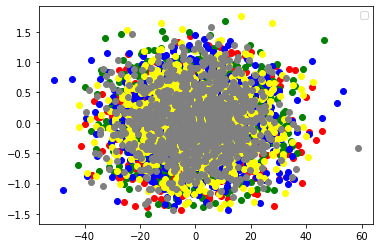

In [221]:
colors=['red','green','blue','yellow','grey']

for i in range(len(res)):
    scatter=plt.scatter(res[i][:, 0], res[i][:, 1],c=colors[i],
                    cmap=matplotlib.colors.ListedColormap(colors),marker='o')
plt.legend(*scatter.legend_elements())
plt.show()

The result of 2b and 2c are the same. 

### Q2 d)

In [223]:
np.linalg.eig(P.T @P )

(array([200.031294,   0.281206]),
 matrix([[ 0.99992166, -0.01251662],
         [ 0.01251662,  0.99992166]]))

In [77]:
P.I

matrix([[ 0.03333333, -0.06666667],
        [ 1.33333333,  1.33333333]])

In [222]:
R.I

matrix([[200.    ,   2.5   ],
        [  2.5   ,   0.3125]])